# Importing packages

In [38]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.express as px
import seaborn as sns

In [39]:
import matplotlib
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [40]:
import datetime as dt
from datetime import datetime

# Getting the data

In [41]:
df = pd.read_csv(r"E:\Machine Learning Project\archive (1)\AirPassengers.csv")

In [42]:
df.head(13)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [43]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [44]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [45]:
df_copy = df.copy()

In [46]:
df_copy['Date'] = pd.to_datetime(df_copy.Month)

In [47]:
df_copy.head()

,Month,#Passengers,Date
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01


In [48]:
df_copy.dtypes

Month                  object
#Passengers             int64
Date           datetime64[ns]
dtype: object

<AxesSubplot:xlabel='Date'>

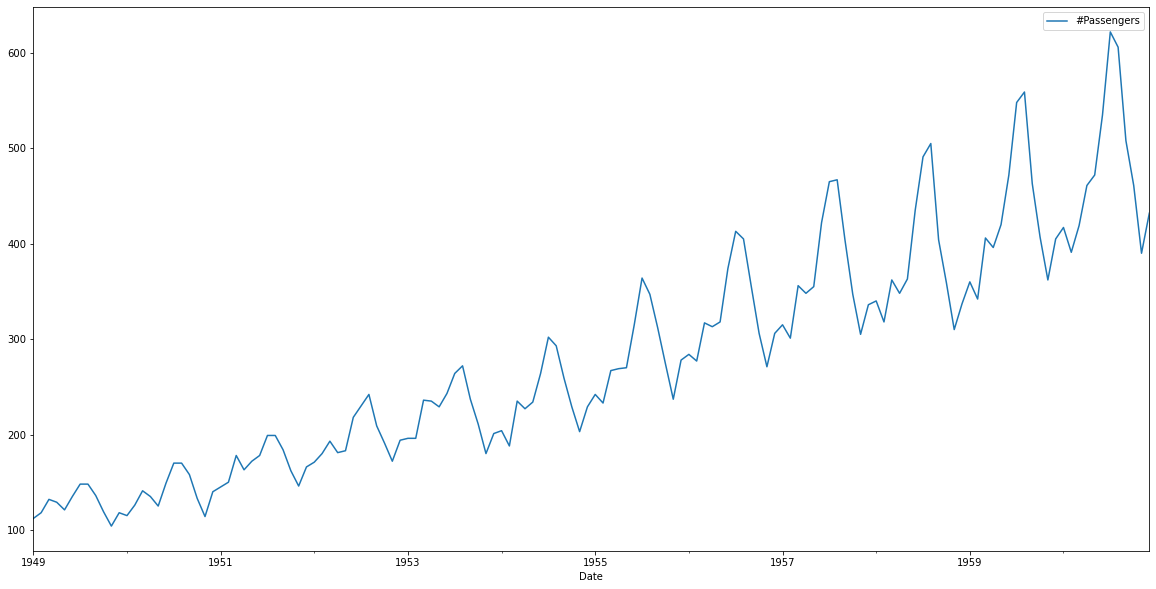

In [49]:
df_copy.plot(x = 'Date', y = '#Passengers')

In [50]:

df_copy['year'] = pd.DatetimeIndex(df_copy['Date']).year
df_copy['month'] = pd.DatetimeIndex(df_copy['Date']).month

In [51]:
df_copy['month'].value_counts()

1     12
2     12
3     12
4     12
5     12
6     12
7     12
8     12
9     12
10    12
11    12
12    12
Name: month, dtype: int64

In [52]:
df_copy['year'].max()

1960

In [53]:
df_copy.set_index('Date', inplace = True)

In [57]:
df_copy.rename(columns = {'#Passengers': 'Passengers'}, inplace = True)

<AxesSubplot:xlabel='Date'>

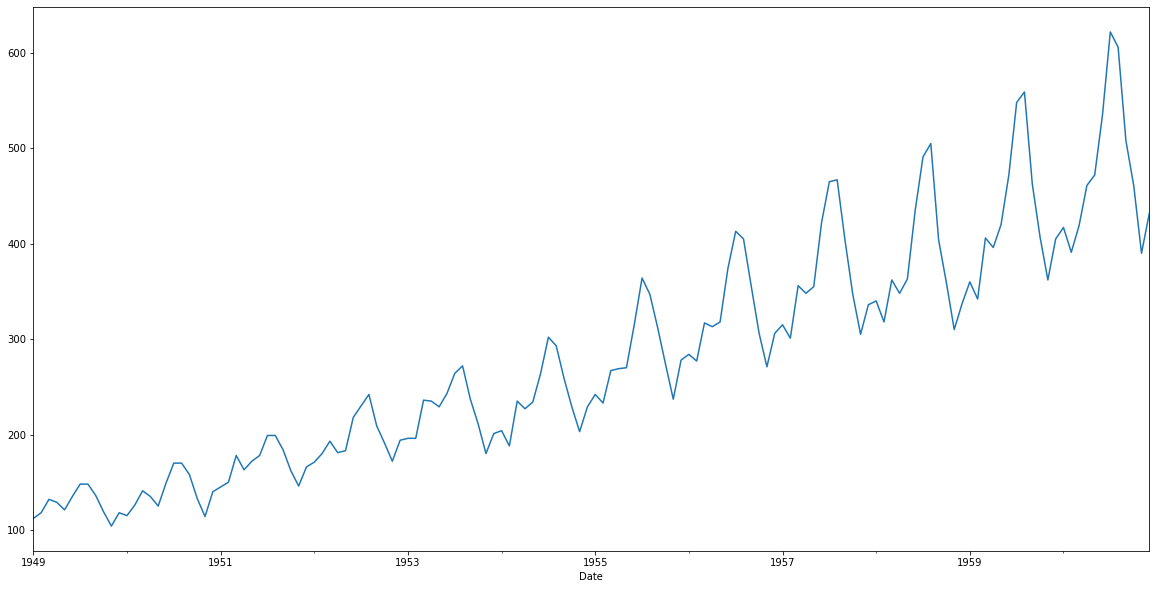

In [59]:
df_copy.Passengers.plot()

In [60]:

from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [61]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

# Seasonal Decomposition

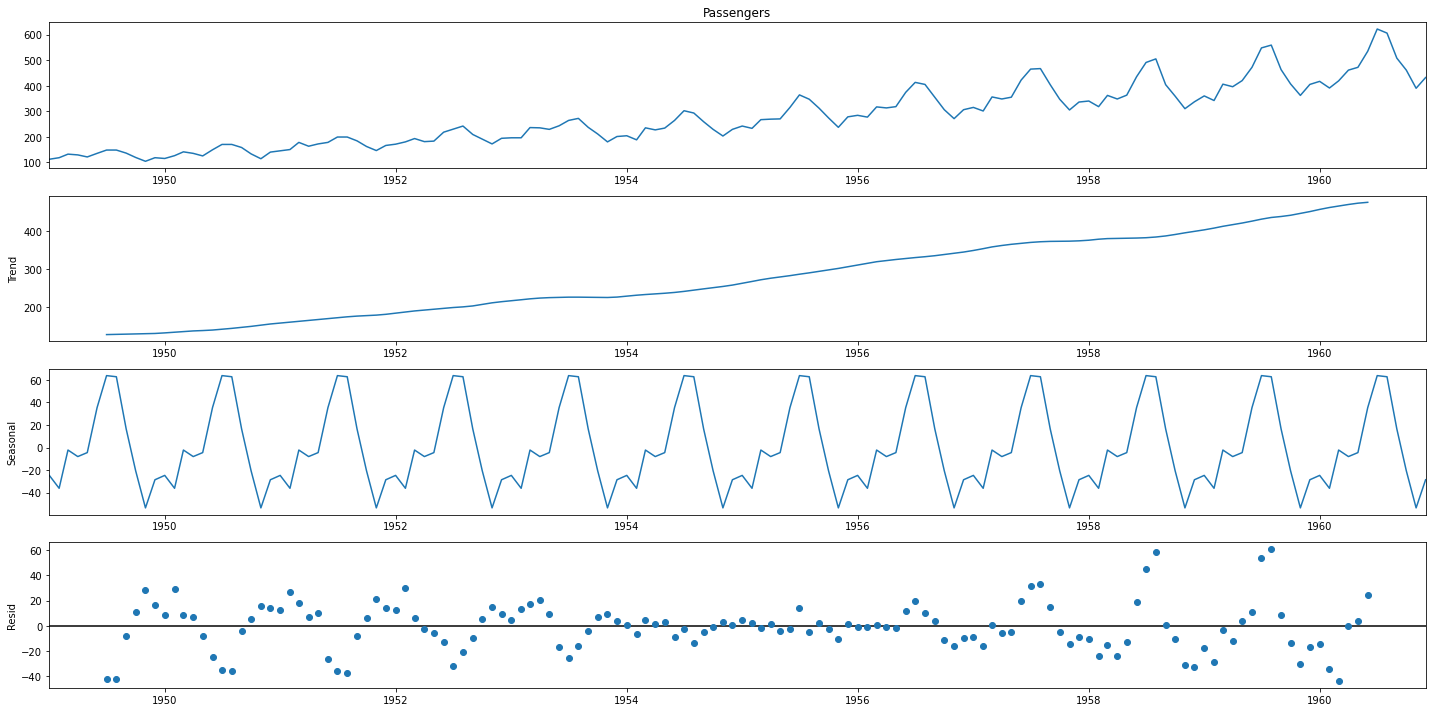

In [63]:
result_add = seasonal_decompose(df_copy.Passengers, model='additive')
result_add.plot()
plt.show()

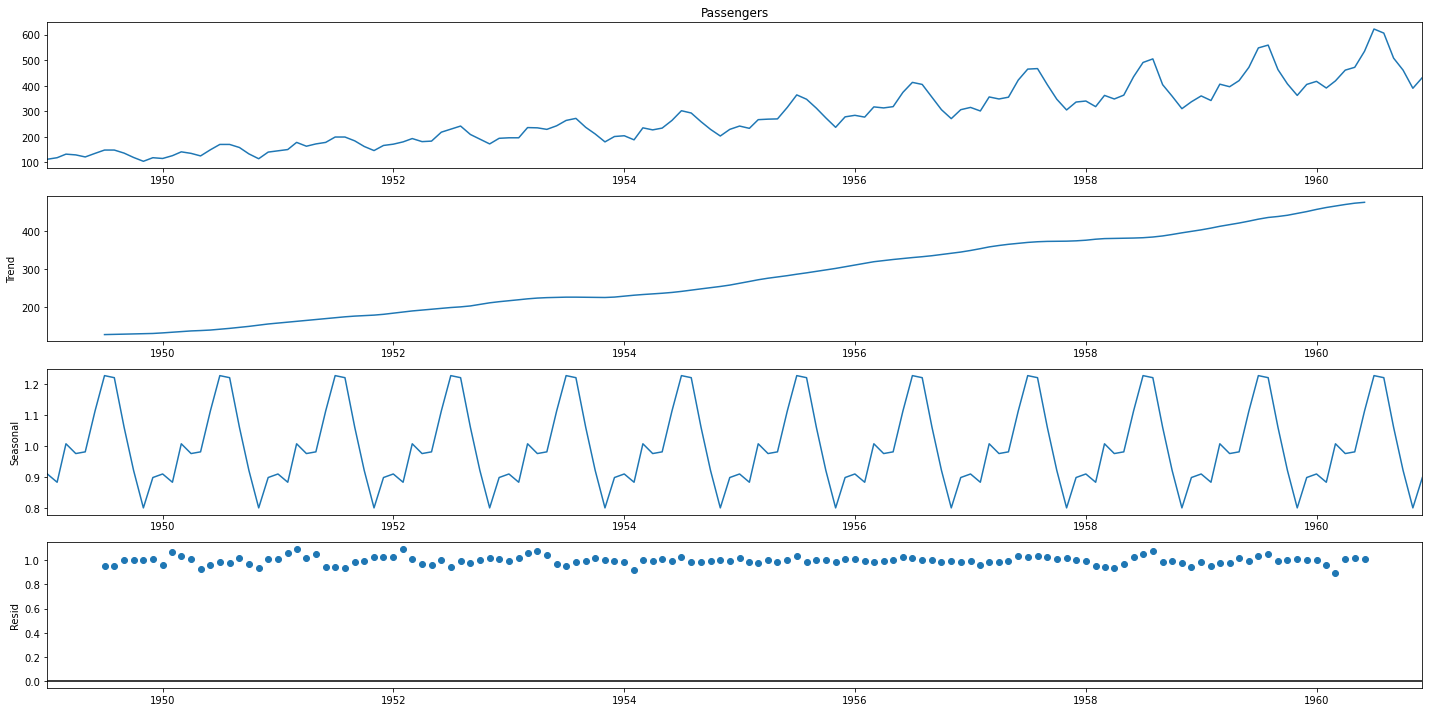

In [64]:
result_mul = seasonal_decompose(df_copy.Passengers, model='multiplicative')
result_mul.plot()
plt.show()

In [66]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_copy.Passengers)

(0.8153688792060463,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [67]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

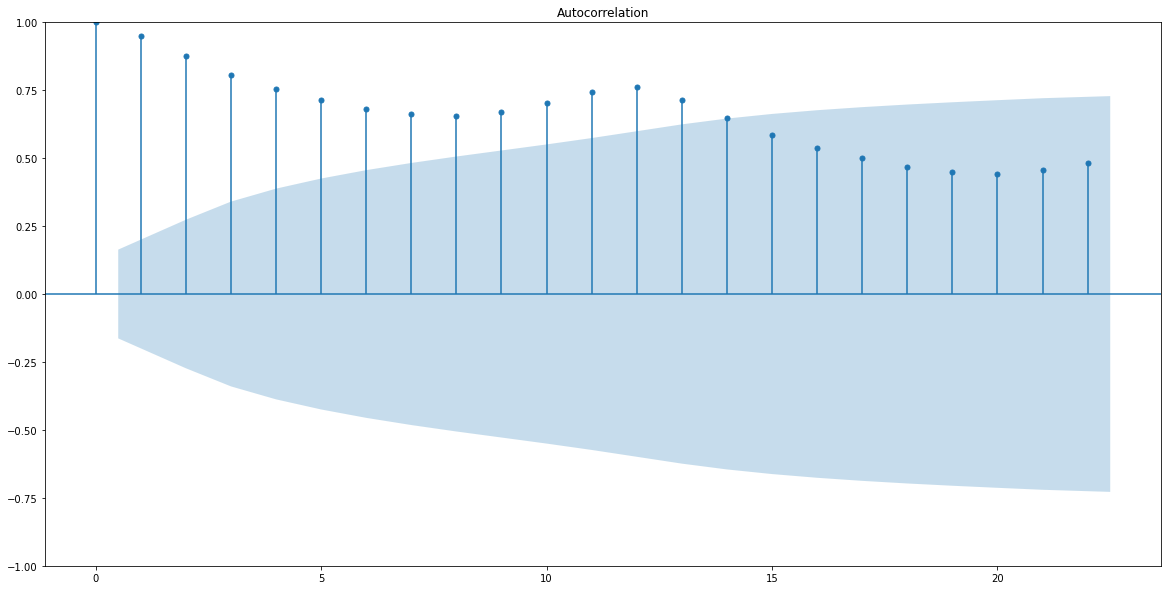

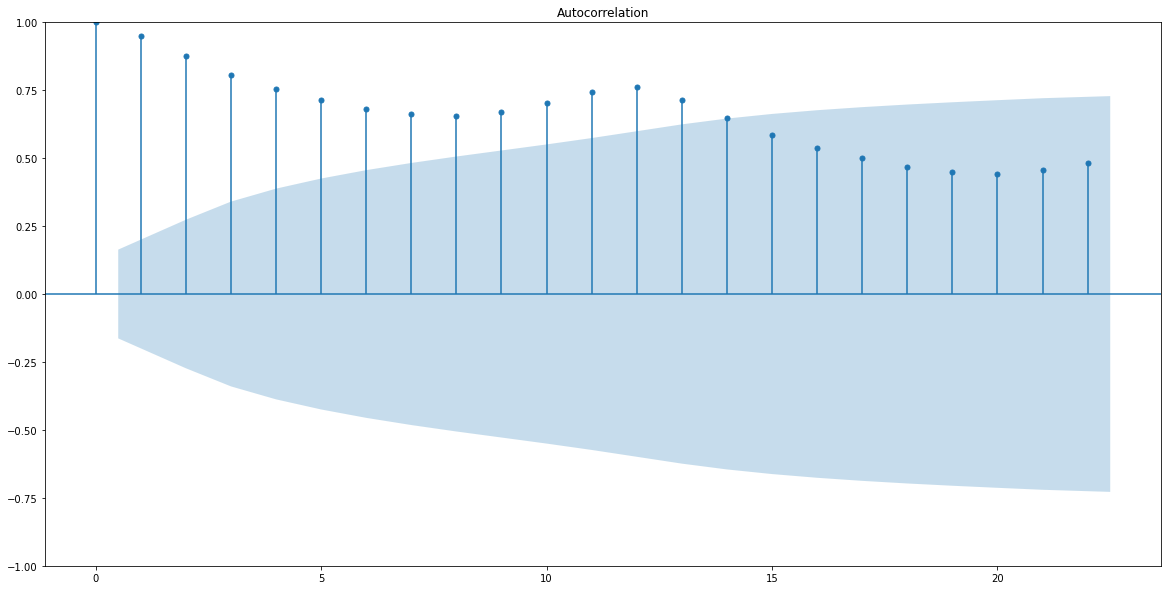

In [108]:
plot_acf(df_copy.Passengers)

(-15.595618083746338, 1.856511600123444e-28, 0, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 919.8428088960275)


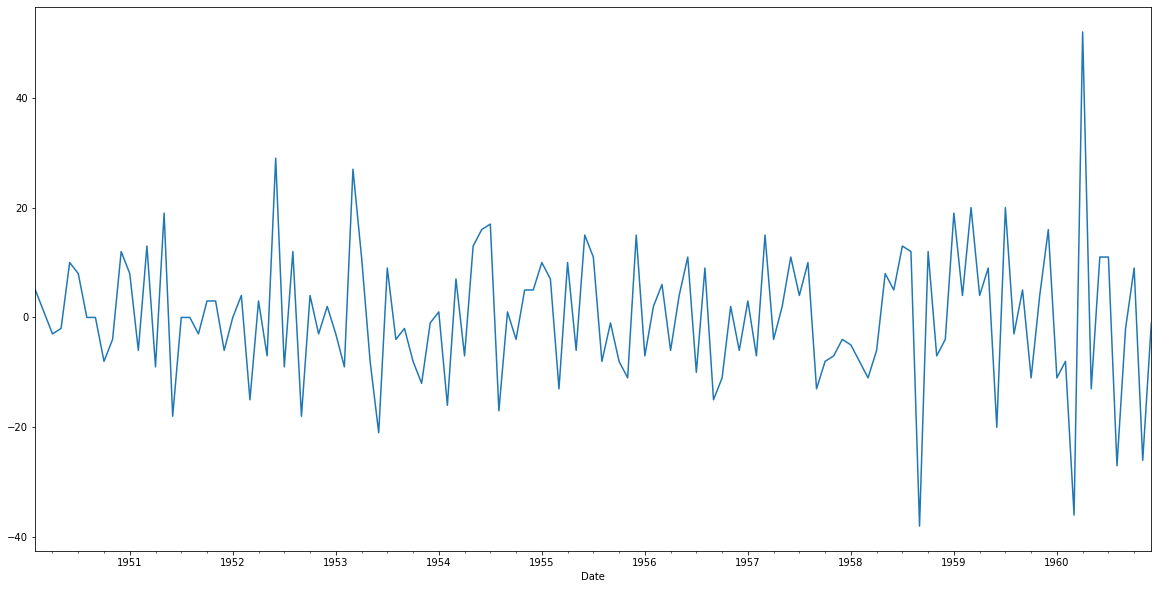

In [69]:
passenger_diff = df_copy.Passengers.diff(12)
passenger_diff = passenger_diff.diff(1)
passenger_diff = passenger_diff.dropna()
passenger_diff.plot()

print(adfuller(passenger_diff))

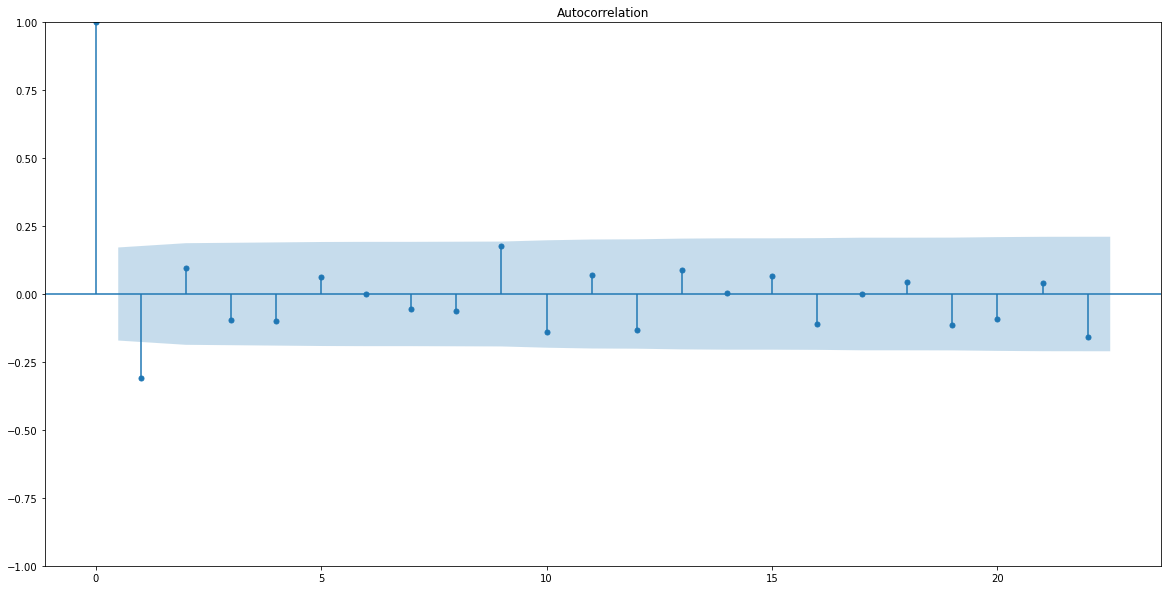

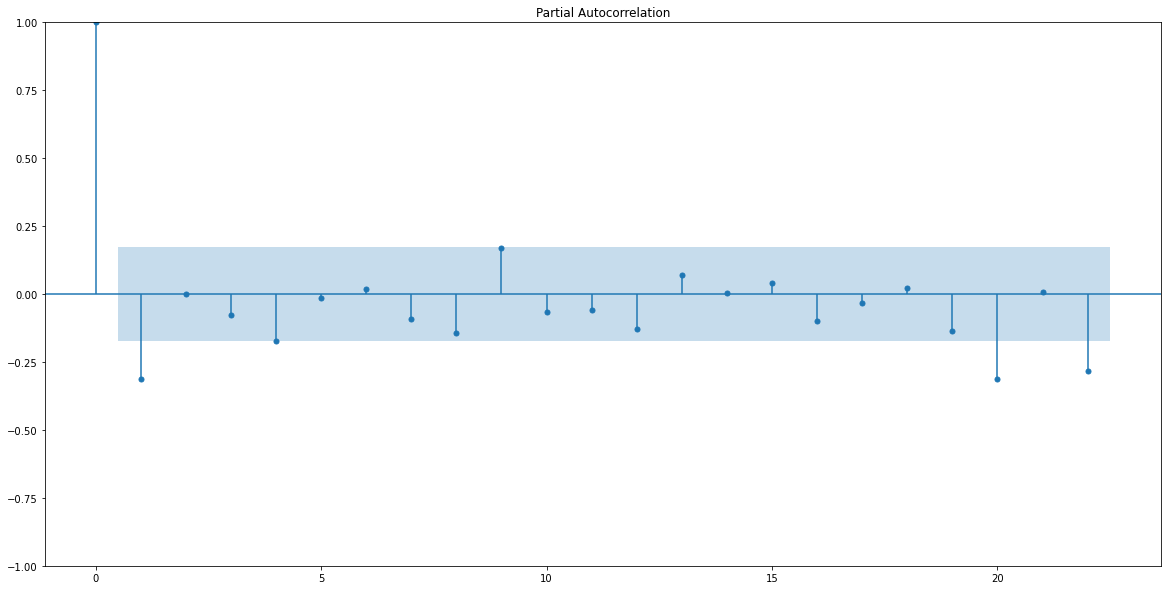

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(passenger_diff)
matplotlib.pyplot.show()
plot_pacf(passenger_diff)
matplotlib.pyplot.show()

# Splitting the data

In [71]:
size = int(len(df_copy) * 0.8)`
df_tr, df_test = df_copy[ : size], df_copy[size:]

# Model Selection

In [87]:
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
i = 0
aic_min = pd.DataFrame(columns = ['AIC', 'param', 'param_seasonal'])
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_tr.Passengers,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            aic_min.loc[i, 'param'] = param
            aic_min.loc[i, 'param_seasonal'] = param_seasonal
            aic_min.loc[i, 'AIC'] = results.aic
            i = i+1
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:751.1547700842275
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:668.0402203303636
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:583.2834111562609
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:674.7163386016675
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:670.0399394652434
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:584.2285424062674
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:589.8276599797439
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:591.8651075645294
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:582.2925156697163
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:742.9177748831488
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:659.3415689115114
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:575.8334251660797
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:673.7652129893632
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:658.3864100435014
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - 

In [91]:
aic_min[aic_min['AIC'] == aic_min['AIC'].min()]

,AIC,param,param_seasonal
23,566.377275,"(0, 1, 2)","(1, 1, 2, 12)"


In [92]:
#ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:822.9785272906739
size = int(len(df_copy) * 0.8)
df_tr, df_test = df_copy[ : size], df_copy[size:]

In [93]:
df_tr

,Month,Passengers,year,month
Date,,,,
1949-01-01,1949-01,112,1949,1
1949-02-01,1949-02,118,1949,2
1949-03-01,1949-03,132,1949,3
1949-04-01,1949-04,129,1949,4
1949-05-01,1949-05,121,1949,5
...,...,...,...,...
1958-03-01,1958-03,362,1958,3
1958-04-01,1958-04,348,1958,4
1958-05-01,1958-05,363,1958,5


In [96]:
mod = sm.tsa.statespace.SARIMAX(df_tr.Passengers, exogenous = df_tr[['year', 'month']], order=(0,1,2), seasonal_order=(1,1,2,12))
results = mod.fit()
print (results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  115
Model:             SARIMAX(0, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -370.748
Date:                            Wed, 28 Dec 2022   AIC                            753.495
Time:                                    12:08:51   BIC                            769.245
Sample:                                01-01-1949   HQIC                           759.873
                                     - 07-01-1958                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2106      0.093     -2.255      0.024      -0.394      -0.028
ma.L2          0.0515      0.120   

In [100]:
len(df_test)

29

# Prediction

<AxesSubplot:xlabel='Date'>

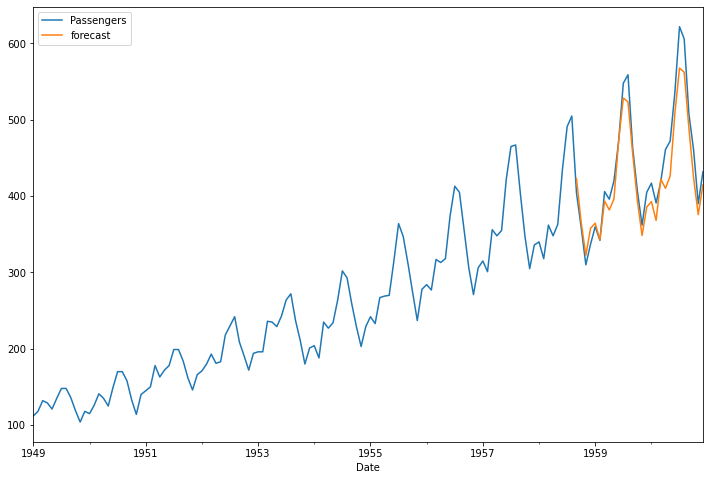

In [101]:
df_copy['forecast'] = results.predict(start = 116, end= 145, dynamic= True)  
df_copy[['Passengers', 'forecast']].plot(figsize=(12, 8))

<AxesSubplot:xlabel='Date'>

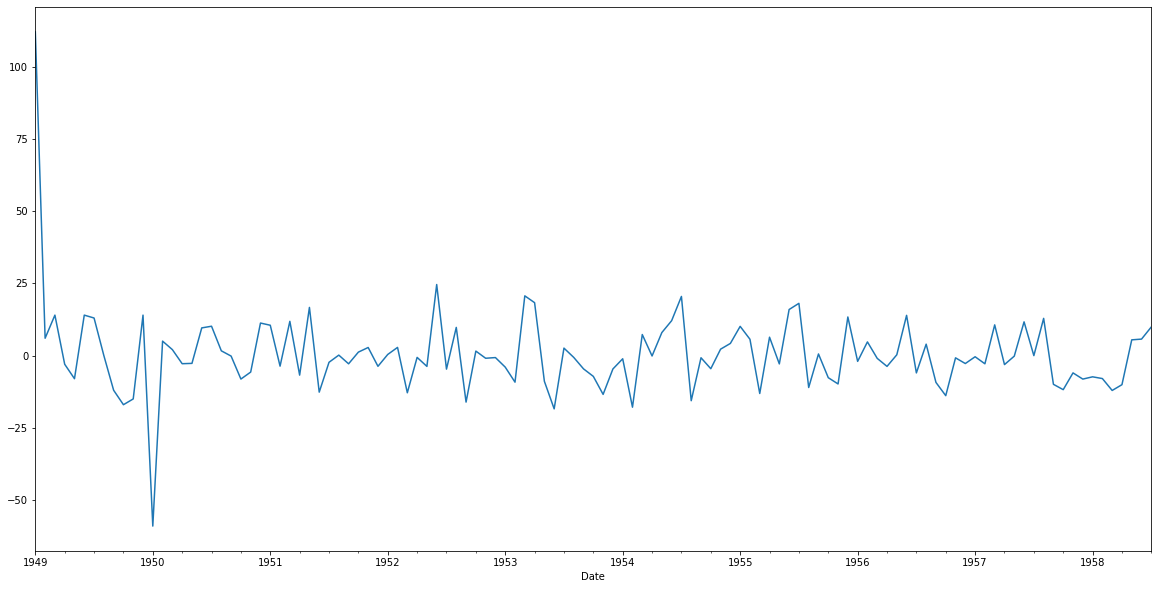

In [102]:
results.resid.plot()

# Plot diagnostics

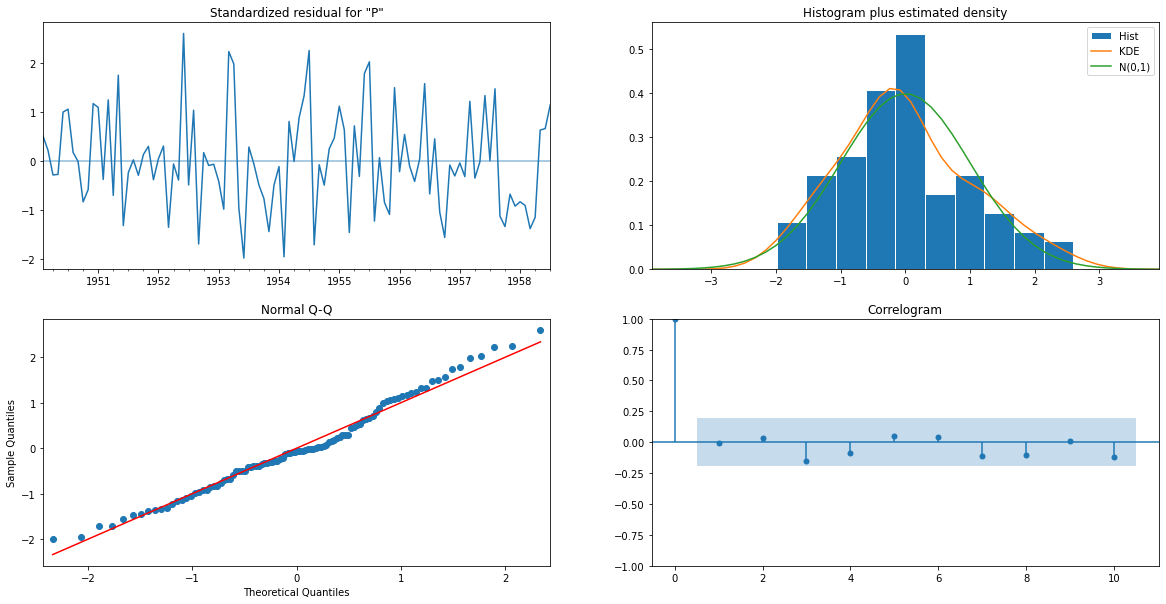

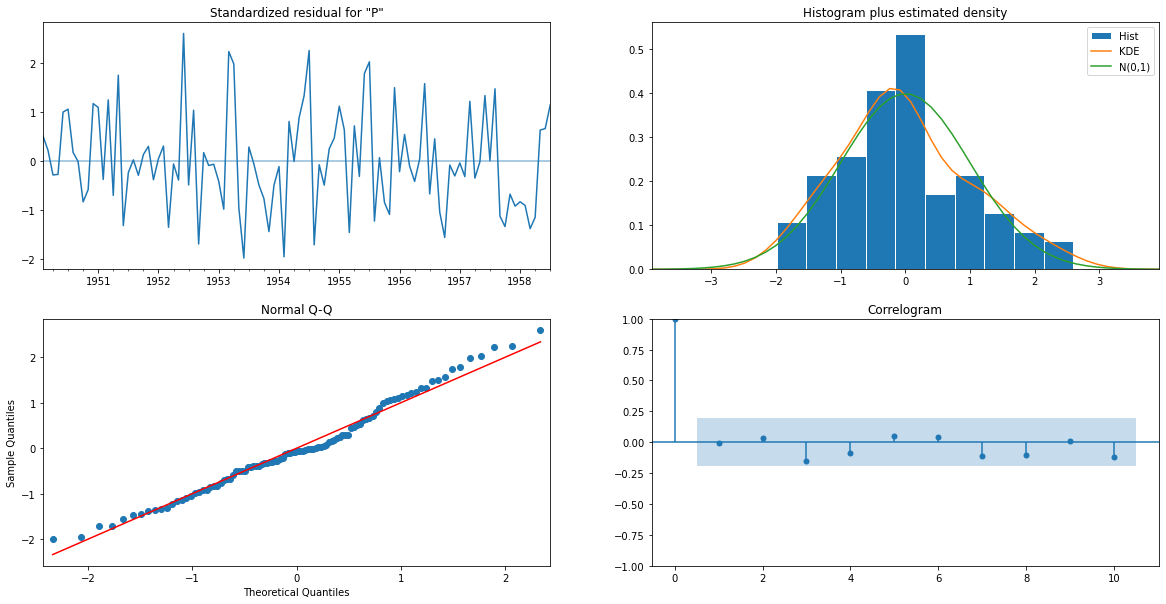

In [103]:
results.plot_diagnostics()

In [104]:
forecasted_values = results.get_forecast(steps = 12)

In [105]:
forecasted_values.predicted_mean

1958-08-01    485.903790
1958-09-01    423.043421
1958-10-01    365.532234
1958-11-01    322.329753
1958-12-01    357.820157
1959-01-01    364.543483
1959-02-01    342.415056
1959-03-01    393.565255
1959-04-01    381.913545
1959-05-01    396.214853
1959-06-01    472.156953
1959-07-01    528.504390
Freq: MS, Name: predicted_mean, dtype: float64

In [106]:
df_pred = df_copy[df_copy['forecast'].notnull()]

<AxesSubplot:xlabel='Date'>

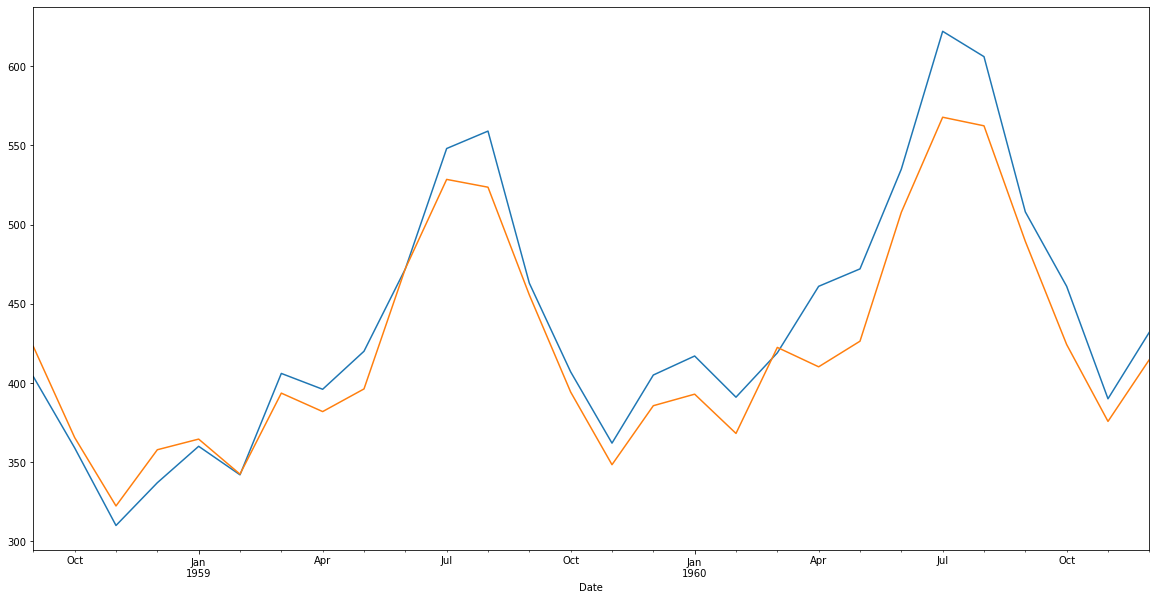

In [107]:
df_pred.Passengers.plot()
df_pred.forecast.plot()